In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from numpy.linalg import matrix_power
from networkx.algorithms.community.centrality import girvan_newman
from networkx import edge_betweenness_centrality as betweenness
from networkx.generators.community import LFR_benchmark_graph
from sklearn.metrics.cluster import normalized_mutual_info_score
from networkx.algorithms.community.label_propagation import label_propagation_communities

information of LFR graph:
Graph with 1002 nodes and 2239 edges


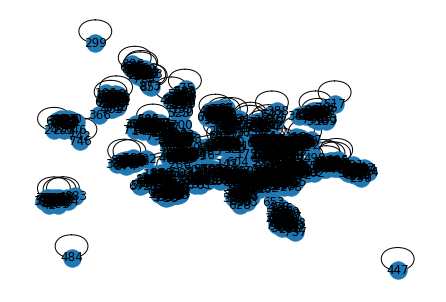

In [8]:
bb,qq,qqq,t = 1002,3,1.09,0.05
G = LFR_benchmark_graph(bb, qq,qqq, t, average_degree=5, min_community=20)
nx.draw(G, with_labels=True)
print('information of LFR graph:')
print(nx.info(G))

In [9]:
'''1. finds the defult community of graph
2.Create a blank dictionary
3.Loop for the list of communities and keep track of the number for the community
4.Loop for each node in a community
5.Create dictionary for the person, where the value in which group they belong.'''
COMM = {frozenset(G.nodes[node]['community']) for node in G}
DIC = {} 
for i,c in enumerate(COMM): 
  for m1 in c: 
    DIC[m1] = i 
arr=[]
for i in G.nodes():
  arr.append(DIC[i])


In [10]:
# Griven Newman algorithm using edge centrality
def Central_Edge(G):
  TC = betweenness(G)
  return max(TC, key=TC.get)
OM = girvan_newman(G, most_valuable_edge=Central_Edge)  
New_Man = [c for c in next(OM)]

In [11]:
DIC = {} #a blank dictionary
for i,c in enumerate(New_Man): # keeping track of the number for the community
  # Loop for each person in a community
  for m1 in c: 
# dictionary for the person, where the value is which group they belong to.
    DIC[m1] = i 
arr2=[]
for i in G.nodes():
  arr2.append(DIC[i])    

In [12]:
print('NMI of Grivman Newman algorithm')
print(normalized_mutual_info_score(arr, arr2))

NMI of Grivman Newman algorithm
0.5216719531242248


In [13]:
# Label Propagation algorithm
COMM_L = label_propagation_communities(G)
DIC = {} 
for i,c in enumerate(COMM_L): 
  for m1 in c:
    DIC[m1] = i
arr1=[]
for i in G.nodes():
  arr1.append(DIC[i])     

In [14]:
print('NMI of label propagation algorithm')
print(normalized_mutual_info_score(arr,arr1))

NMI of label propagation algorithm
0.8788076431861692


In [15]:
# Method for evaluate K-shell index
def KSI(graph1=G):
# search if there is any node left with degree d
    def search(x, d):
        #if there is no node of deg <= d
        mmm = 0 
        for i in x.nodes():
            if (x.degree(i) <= d):
                mmm = 1
                break
        return mmm
    # list of nodes with specific degree
    def search_N(x, tt):
        S1 = []
        for i in x.nodes():
            if (x.degree(i) <= tt):
                S1.append(i)
        return S1
    # Copying graph
    x,tt = graph1.copy(),1
    L = []
    LIS = []
    while (1):
        YY = search(x, tt)
        if (YY == 0):
            tt += 1
            LIS.append(L)
            L = []
        if (YY == 1):
           complete_node = search_N(x, tt)
           for each in complete_node:
                x.remove_node(each)
                L.append(each)
        if (x.number_of_nodes() == 0):
            LIS.append(L)
            break    
    DDD = {} 
    for i,c in enumerate(LIS): 
        for m1 in c: 
            DDD[m1] = i+1
    return DDD

In [18]:
# Label propagation lagorithm based on node imporatnace (NI-LPA)
NNN = {}
t=10
LL = {} 
for j in G.nodes():
    LL[j]=j
NNN[0] = LL   
for t in range(1,t):
    AA = list(G.adjacency())#[0][1].keys()
    Value=[]
    for i in G.nodes():
        S2 = set(AA[i][1].keys())
        CCC = []
        for j in G.nodes():
            CCC1 = set(AA[j][1].keys())
            INT = len(S2.intersection(CCC1))
            UNN = len(S2.union(CCC1))
            I_J = (UNN-INT) / UNN  
            CCC.append(I_J)
        Value.append(CCC)
    # calling method
    KK1 = KSI(G)
    VV = 2# Signal propagation amount
    A = nx.adjacency_matrix(G)
    A = np.array(A.todense())
    I = np.identity(A.shape[0], dtype = int)
    S = matrix_power(A+I,VV)
    S = np.array(S)
    # Node importance index 
    DICS = dict(AA)
    GGG={}
    for i in G.nodes():    
        PLUS = 0
        for k in DICS[i].keys():
            PLUS += 1+Value[i][k]+KK1[k]
        GGG[i] = S[i][i] * KK1[i] * PLUS 
    Lev_N={}   # Update the label of node
    for i in G.nodes():   
        BB = []
        DD1 = {}
        for k in DICS[i].keys():
            BB.append(NNN[t-1][k])
            DD1[k]=GGG[k]
        RRR = Counter(BB)   
        # greater the label in near     
        if (sorted(RRR.values())[-1] > 1):
            Keymax = max(zip(RRR.values(), RRR.keys()))[1]
            # highest importance on near node
        else:  
            Keymax = max(zip(DD1.values(), DD1.keys()))[1]
        Lev_N[i] = Keymax
    NNN[t]=Lev_N   
    result = NNN[t]
    if NNN[t] == NNN[t-1]:      
        print('Break')
        break       
NI_LPA=[]
for i in G.nodes():
    NI_LPA.append(result[i])    
print('NMI of Label propagation algorithm  based on node importance')
print(normalized_mutual_info_score(arr, NI_LPA))

NMI of Label propagation algorithm  based on node importance
0.8863848614268359
